In [1]:
import os, sys
import json
import pandas as pd
# import networkx as nx
# import bct
import numpy as np
# import utils_network_metrics
import pickle
# import graph_tool.all as gt
from sqlitedict import SqliteDict
# import utils_network
# import utils_gt
# import utils_networkx # functions for generating different nodes/edges need for the networks
%load_ext autoreload
%autoreload 2

In [2]:
## plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
snapshot = "2022-03"
wiki_db = "enwiki"

# Load datasets

### Setup

In [4]:
# define datasets to get consistent labels
list_datasets = ["app-sample-v1","app-sample-v2","knot", "rw-1.0","rw-0.375","rw-0.0","wikispeedia"]
PATH_base = "/home/mgerlach/REPOS/curios-critical-readers/"
dict_datasets_filenames = {
    "app-sample-v1": os.path.join(PATH_base,"results/networkMetrics1000_df.csv"),
    "app-sample-v2": os.path.join(PATH_base,"results/networkMetrics1000_v2_df.csv"),
    "knot": os.path.join(PATH_base,"KNOT_metrics.csv"),
    "rw-1.0": os.path.join(PATH_base,"results/networkMetrics1000_v2_rw-1.0_df.csv"),
    "rw-0.375": os.path.join(PATH_base,"results/networkMetrics1000_v2_rw-0.375_df.csv"),
    "rw-0.0": os.path.join(PATH_base,"results/networkMetrics1000_v2_rw-0.0_df.csv"),
    "wikispeedia": os.path.join(PATH_base,"results/networkMetrics1000_wikispeedia-finished_df.csv")
}

dict_datasets_df = {}

cm=plt.colormaps.get("tab10")
dict_dc = {ds:cm(i_ds) for i_ds,ds in enumerate(list_datasets) }


In [5]:
columns_renamed = {
    "N":"Nodes",
    "E":"Edges",
    "rho":"Density",
    "C":"Clustering",
    "k":"Degree",
    "spl":"Characteristic path length", 
    "eff":"Global efficiency", 
    "cp":"Core-ness", 
    "mdl":"MDL", 
    "modq":"Modularity",
    "B":"Groups"
}

## Wikipedia-app readers

In [6]:
# cols_meta = ["Nodes","Edges","Density"]
# cols_metrics = ["Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL", "Groups", "Modularity"]
# cols = cols_meta+cols_metrics
# print(cols)

### original sample (1000 randomly of any size)

In [7]:
## these columns do not change in the random null model
dataset = list_datasets[0]
FNAME_read = dict_datasets_filenames[dataset]
df = pd.read_csv(FNAME_read,index_col=0).rename(columns=columns_renamed)
df = df.dropna()
df["MDL/node"] = df["MDL"]/df["Nodes"] # normalize MDL
df["MDL/edge"] = df["MDL"]/df["Edges"] # normalize MDL

dict_datasets_df[dataset] = df

df.head()

Nodes  Edges   Density  Clustering    Degree  Characteristic path length  \
0      5      1  0.100000    0.000000  0.400000                    1.000000   
1      7      1  0.047619    0.000000  0.285714                    1.000000   
3     35     40  0.067227    0.513016  2.285714                    1.622222   
5     10     21  0.466667    0.621905  4.200000                    1.285714   
6      6      2  0.133333    0.000000  0.666667                    1.333333   

   Global efficiency  Core-ness         MDL  Groups  Modularity  MDL/node  \
0           0.100000   1.200000    3.912023       1        0.00  0.782405   
1           0.047619   1.428571    4.990433       1        0.00  0.712919   
3           0.095798   0.589286  149.053850       2        0.42  4.258681   
5           0.555556   0.466667   39.639582       1        0.00  3.963958   
6           0.166667   1.000000    6.984716       1        0.00  1.164119   

   MDL/edge  
0  3.912023  
1  4.990433  
3  3.726346  
5  1.887599  
6  3.492358

### v2-sample (1000 sessions with more than 100 different nodes)

In [8]:
dataset = list_datasets[1]
FNAME_read = dict_datasets_filenames[dataset]
df = pd.read_csv(FNAME_read,index_col=0).rename(columns=columns_renamed)
df = df.dropna()
df["MDL/node"] = df["MDL"]/df["Nodes"] # normalize MDL
df["MDL/edge"] = df["MDL"]/df["Edges"] # normalize MDL

dict_datasets_df[dataset] = df

df.head()

Nodes  Edges   Density  Clustering    Degree  Characteristic path length  \
0    248    537  0.017533    0.306083  4.330645                    5.927331   
1    267    422  0.011884    0.316029  3.161049                    4.503336   
2    128    356  0.043799    0.523046  5.562500                    3.081404   
3    102    277  0.053776    0.412466  5.431373                    4.226135   
4    279    377  0.009721    0.279696  2.702509                    6.048276   

   Global efficiency  Core-ness          MDL  Groups  Modularity  MDL/node  \
0           0.099668   0.861341  2083.134245       5    0.600755  8.399735   
1           0.101921   0.775618  1944.103249       8    0.758252  7.281286   
2           0.152952   0.748069  1104.739859       5    0.656518  8.630780   
3           0.174582   0.855242   790.099503       5    0.541001  7.746074   
4           0.062234   0.726058  1870.298604       5    0.612363  6.703579   

   MDL/edge  
0  3.879207  
1  4.606880  
2  3.103202  
3  2.852345  
4  4.961004

### Random walks

In [9]:
dataset = list_datasets[3]
print(dataset)
FNAME_read = dict_datasets_filenames[dataset]
df = pd.read_csv(FNAME_read,index_col=0).rename(columns=columns_renamed)
df = df.dropna()
df["MDL/node"] = df["MDL"]/df["Nodes"] # normalize MDL
df["MDL/edge"] = df["MDL"]/df["Edges"] # normalize MDL

dict_datasets_df[dataset] = df

df.head()

rw-1.0


Nodes  Edges   Density  Clustering     Degree  Characteristic path length  \
0    393   1646  0.021369    0.587353   8.376590                    2.720985   
1    459   2813  0.026762    0.618181  12.257081                    2.722151   
2    198    665  0.034097    0.569053   6.717172                    3.044045   
3    170    629  0.043787    0.603531   7.400000                    2.785729   
4    349   1335  0.021984    0.481270   7.650430                    3.314544   

   Global efficiency  Core-ness          MDL  Groups  Modularity   MDL/node  \
0           0.402411   0.626030  5590.613144      16    0.529088  14.225479   
1           0.402045   0.691344  8015.419466      26    0.500295  17.462788   
2           0.381149   0.536341  2331.636171      10    0.433328  11.775940   
3           0.401834   0.500477  2028.080990      12    0.517373  11.929888   
4           0.337221   0.700080  4753.411246      15    0.551513  13.620090   

   MDL/edge  
0  3.396484  
1  2.849420  
2  3.506220  
3  3.224294  
4  3.560608

In [10]:
dataset = list_datasets[4]
print(dataset)
FNAME_read = dict_datasets_filenames[dataset]
df = pd.read_csv(FNAME_read,index_col=0).rename(columns=columns_renamed)
df = df.dropna()
df["MDL/node"] = df["MDL"]/df["Nodes"] # normalize MDL
df["MDL/edge"] = df["MDL"]/df["Edges"] # normalize MDL

dict_datasets_df[dataset] = df

df.head()

rw-0.375


Nodes  Edges   Density  Clustering    Degree  Characteristic path length  \
0    398    808  0.010227    0.299129  4.060302                    3.037331   
1    464    952  0.008863    0.290060  4.103448                    3.173684   
2    199    173  0.008781    0.169064  1.738693                    3.412526   
3    172    227  0.015436    0.191405  2.639535                    3.279492   
4    352    511  0.008272    0.166364  2.903409                    3.367109   

   Global efficiency  Core-ness          MDL  Groups  Modularity  MDL/node  \
0           0.248344   0.910468  3356.225989       3    0.063435  8.432729   
1           0.235854   0.856237  4272.997867       5    0.257849  9.209047   
2           0.092418   0.837598   888.138552       1    0.000000  4.463008   
3           0.191073   0.854011   962.479779       2   -0.183246  5.595813   
4           0.187955   0.839297  2463.369898       3    0.033354  6.998210   

   MDL/edge  
0  4.153745  
1  4.488443  
2  5.133749  
3  4.239999  
4  4.820685

In [11]:
dataset = list_datasets[5]
print(dataset)
FNAME_read = dict_datasets_filenames[dataset]
df = pd.read_csv(FNAME_read,index_col=0).rename(columns=columns_renamed)
df = df.dropna()
df["MDL/node"] = df["MDL"]/df["Nodes"] # normalize MDL
df["MDL/edge"] = df["MDL"]/df["Edges"] # normalize MDL

dict_datasets_df[dataset] = df

df.head()

rw-0.0


Nodes  Edges   Density  Clustering    Degree  Characteristic path length  \
0    392    188  0.002453    0.034171  0.959184                    4.508158   
1    457    407  0.003906    0.103037  1.781182                    3.278387   
2    197     50  0.002590    0.011901  0.507614                    3.467023   
3    168     41  0.002923    0.025000  0.488095                    2.991667   
4    341    292  0.005037    0.100670  1.712610                    3.279785   

   Global efficiency  Core-ness          MDL  Groups  Modularity  MDL/node  \
0           0.033017   1.168367  1134.727995       1    0.000000  2.894714   
1           0.050903   1.240883  1939.217954       2    0.099472  4.243365   
2           0.011055   1.461929   315.342832       1    0.000000  1.600725   
3           0.006551   1.464286   267.785367       1    0.000000  1.593961   
4           0.079308   1.160065  1414.354433       1    0.000000  4.147667   

   MDL/edge  
0  6.035787  
1  4.764663  
2  6.306857  
3  6.531350  
4  4.843680

### KNOT-data

NOTE: the last two columns are not yet available

In [12]:
dataset = list_datasets[2]
print(dataset)
FNAME_read = dict_datasets_filenames[dataset]

# format is different: the column names have to be explicitly defined
cols = ["Nodes","Density","Clustering","Degree","Characteristic path length","Global efficiency","Core-ness","MDL","Modularity"]
df = pd.read_csv(FNAME_read,index_col=None,header=None, names=cols)#.rename(columns=columns_renamed)
df = df.dropna()
df["MDL/node"] = df["MDL"]/df["Nodes"] # normalize MDL
# df["MDL/edge"] = df["MDL"]/df["Edges"] # normalize MDL

dict_datasets_df[dataset] = df

# df.head()

knot


### Wikispeedia

In [13]:
dataset = list_datasets[6]
print(dataset)
FNAME_read = dict_datasets_filenames[dataset]
df = pd.read_csv(FNAME_read,index_col=0).rename(columns=columns_renamed)
df = df.dropna()
df["MDL/node"] = df["MDL"]/df["Nodes"] # normalize MDL
df["MDL/edge"] = df["MDL"]/df["Edges"] # normalize MDL

dict_datasets_df[dataset] = df

df.head()

wikispeedia


Nodes  Edges   Density  Clustering    Degree  Characteristic path length  \
0      6      5  0.333333    0.000000  1.666667                    2.333333   
1      6      7  0.466667    0.500000  2.333333                    1.733333   
2     16     35  0.291667    0.601339  4.375000                    2.808333   
3     19     55  0.321637    0.423559  5.789474                    1.871345   
4      4      3  0.500000    0.000000  1.500000                    1.666667   

   Global efficiency  Core-ness         MDL  Groups  Modularity  MDL/node  \
0           0.580000   0.266667   11.350995       1         0.0  1.891832   
1           0.700000   0.333333   15.256049       1         0.0  2.542675   
2           0.527361   0.410714   87.251839       1         0.0  5.453240   
3           0.630117   0.274641  131.570783       1         0.0  6.924778   
4           0.722222   0.333333    5.886104       1         0.0  1.471526   

   MDL/edge  
0  2.270199  
1  2.179436  
2  2.492910  
3  2.392196  
4  1.962035

# Compare Wikipedia and KNOT

In [14]:
i_datasets_plot = [0,1,2]

### Size Distribution

In [15]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

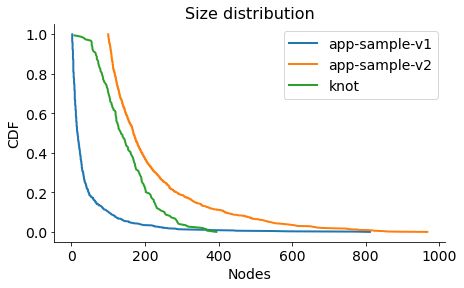

In [16]:
alpha=1
ms = 0
lw=2
fig = plt.figure(figsize=(7,4 ))
ax = fig.add_subplot(1,1,1)

for i_dataset in i_datasets_plot:
    dataset = list_datasets[i_dataset]
    df = dict_datasets_df[dataset]
    try:
        x = np.sort(df["Nodes"].values)
        y = 1.-(np.arange(len(x))+1)/len(x)
        ax.plot(x,y,ms=ms,marker="o",lw=lw, alpha=alpha, label=dataset,color=dict_dc[dataset])
    except:
        pass
        
ax.set_title("Size distribution")
ax.set_xlabel("Nodes")
ax.set_ylabel("CDF")
ax.legend()
# plt.subplots_adjust(hspace=0.4,wspace=0.4)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))

### Scaling with Size

In [17]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

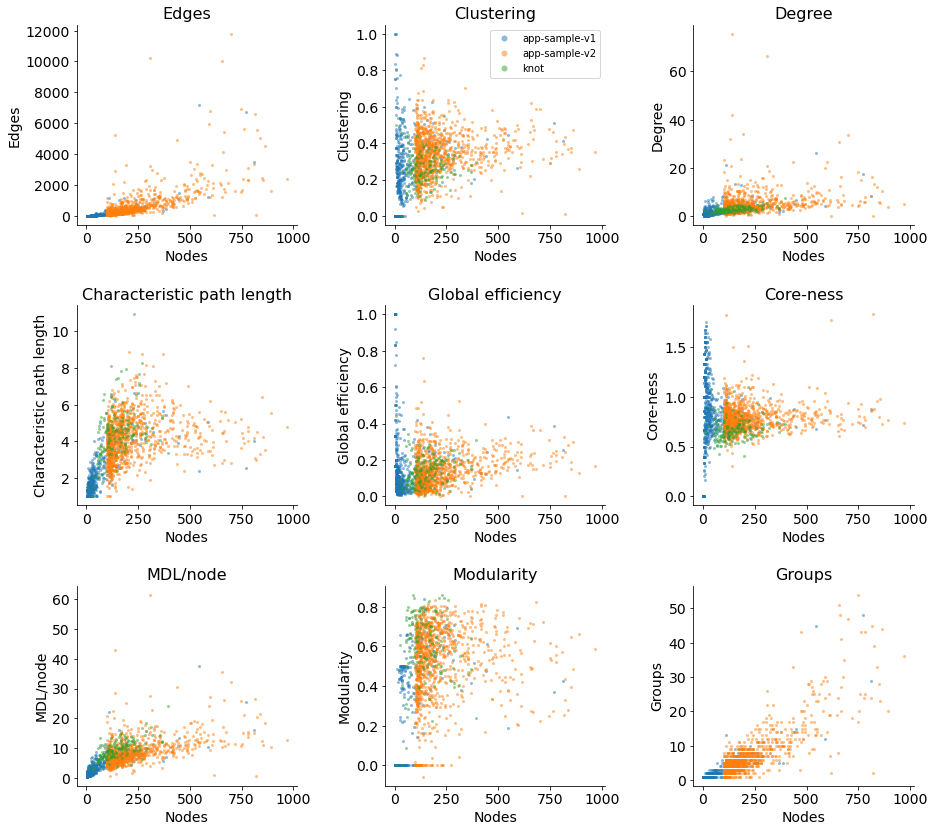

In [18]:
## nodes
n_rows = 3
n_cols = 3

cols_plot = ["Edges","Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]

alpha=0.5
ms = 3
fig = plt.figure(figsize=(15,14 ))
for i, label in enumerate(cols_plot):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    
    for i_dataset in i_datasets_plot:
        dataset = list_datasets[i_dataset]
        df = dict_datasets_df[dataset]
        try:
            x = df["Nodes"].values
            y = df[label].values
            ax.plot(x,y,ms=ms,marker="o",lw=0, mew=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
        except:
            pass
    
    ax.set_title(label)
    ax.set_xlabel("Nodes")
    ax.set_ylabel(label)
    if i==1:
        ax.legend(markerscale=2)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))

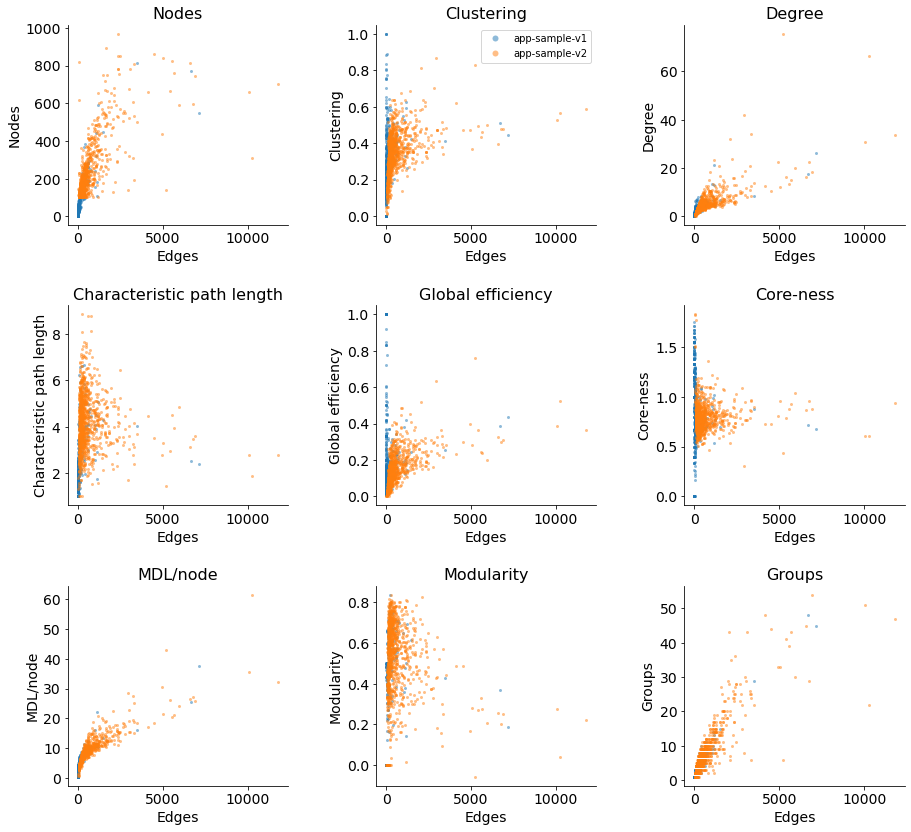

In [19]:
## edges
n_rows = 3
n_cols = 3

cols_plot = ["Nodes","Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]

alpha=0.5
ms = 3
fig = plt.figure(figsize=(15,14 ))
for i, label in enumerate(cols_plot):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    
    for i_dataset in i_datasets_plot:
        dataset = list_datasets[i_dataset]
        df = dict_datasets_df[dataset]
        try:
            x = df["Edges"].values
            y = df[label].values
            ax.plot(x,y,ms=ms,marker="o",lw=0,mew=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
        except:
            pass
    
    ax.set_title(label)
    ax.set_xlabel("Edges")
    ax.set_ylabel(label)
    if i==1:
        ax.legend(markerscale=2)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))

### Pairwise Scatter

In [20]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

FileNotFoundError: [Errno 2] No such file or directory: 'plots/1000-networks_wiki-knot_scatter.png'

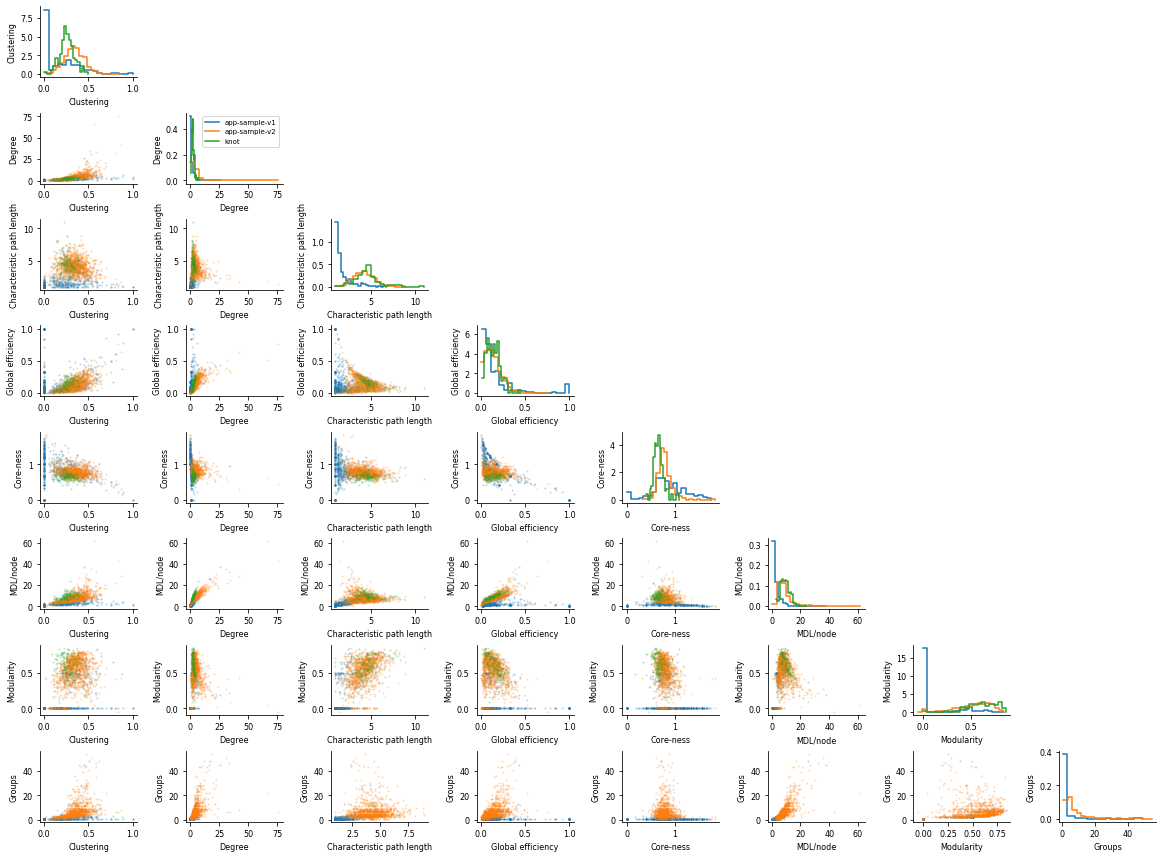

In [21]:

cols_plot = ["Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]
n_rows = len(cols_plot)
n_cols = len(cols_plot)

alpha=0.3
ms = 2

fig = plt.figure(figsize=(20,15 ))
i_plot=0
for i1, label1 in enumerate(cols_plot):
    for i2, label2 in enumerate(cols_plot):
        i_plot+=1
        if i1>i2:
            ax = fig.add_subplot(n_rows,n_cols,i_plot)
            
            for i_dataset in i_datasets_plot:
                dataset = list_datasets[i_dataset]
                df = dict_datasets_df[dataset]
                try:
                    y = df[label1].values
                    x = df[label2].values
                    ax.plot(x,y,ms=ms,marker="o",lw=0, mew=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
                except:
                    pass

#             ax.set_title(label)
            ax.set_xlabel(label2)
            ax.set_ylabel(label1)
#             ax.legend()
        if i1==i2:
            ax = fig.add_subplot(n_rows,n_cols,i_plot)
            
            for i_dataset in i_datasets_plot:
                dataset = list_datasets[i_dataset]
                df = dict_datasets_df[dataset]
                try:
                    x = df[label1].values
                    H,edges = np.histogram(x,bins=20,density=True)
                    H=np.append(H,0)
#                     H=H/np.sum(H)
                    ax.step(edges,H,where="post", label=dataset,color=dict_dc[dataset])
                except:
                    pass
            
            ax.set_xlabel(label2)
            ax.set_ylabel(label1)
            if i1==1:
                ax.legend(markerscale=2)
            
            
plt.subplots_adjust(hspace=0.5,wspace=0.5)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))
plt.savefig("plots/1000-networks_wiki-knot_scatter.png",dpi=300, facecolor='white', transparent=False)

## Random walks

In [22]:
i_datasets_plot = [1,3,4,5]

### Size Distribution

In [23]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

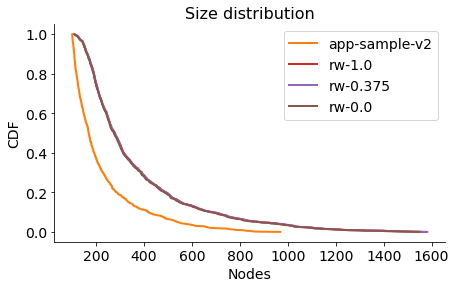

In [24]:
alpha=1
ms = 0
lw=2
fig = plt.figure(figsize=(7,4 ))
ax = fig.add_subplot(1,1,1)

for i_dataset in i_datasets_plot:
    dataset = list_datasets[i_dataset]
    df = dict_datasets_df[dataset]
    try:
        x = np.sort(df["Nodes"].values)
        y = 1.-(np.arange(len(x))+1)/len(x)
        ax.plot(x,y,ms=ms,marker="o",lw=lw, alpha=alpha, label=dataset,color=dict_dc[dataset])
    except:
        pass
        
ax.set_title("Size distribution")
ax.set_xlabel("Nodes")
ax.set_ylabel("CDF")
ax.legend()
# plt.subplots_adjust(hspace=0.4,wspace=0.4)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))

### Scaling with Size

In [25]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

FileNotFoundError: [Errno 2] No such file or directory: 'plots/1000-networks_wiki-rw_nodes.png'

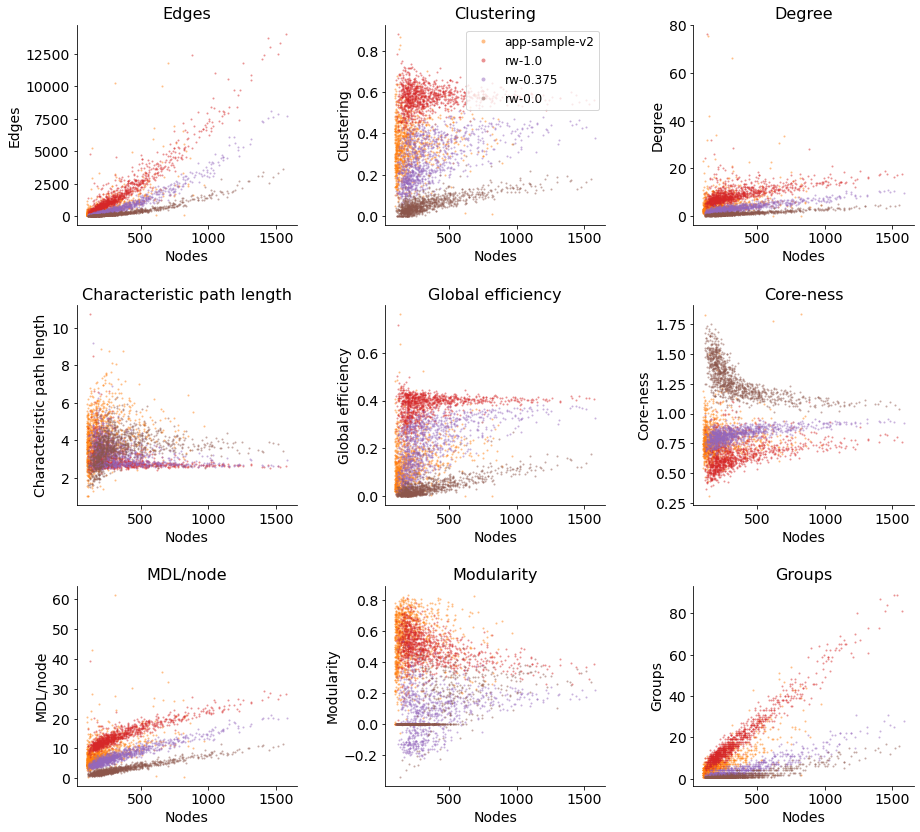

In [26]:
## nodes
n_rows = 3
n_cols = 3

cols_plot = ["Edges","Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]

alpha=0.5
ms = 2
fig = plt.figure(figsize=(15,14 ))
for i, label in enumerate(cols_plot):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    
    for i_dataset in i_datasets_plot:
        dataset = list_datasets[i_dataset]
        df = dict_datasets_df[dataset]
        try:
            x = df["Nodes"].values
            y = df[label].values
            ax.plot(x,y,ms=ms,marker="o",lw=0,mew=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
        except:
            pass
    
    ax.set_title(label)
    ax.set_xlabel("Nodes")
    ax.set_ylabel(label)
    if i==1:
        ax.legend(markerscale=2)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.savefig("plots/1000-networks_wiki-rw_nodes.png",dpi=300, facecolor='white', transparent=False)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/1000-networks_wiki-rw_edges.png'

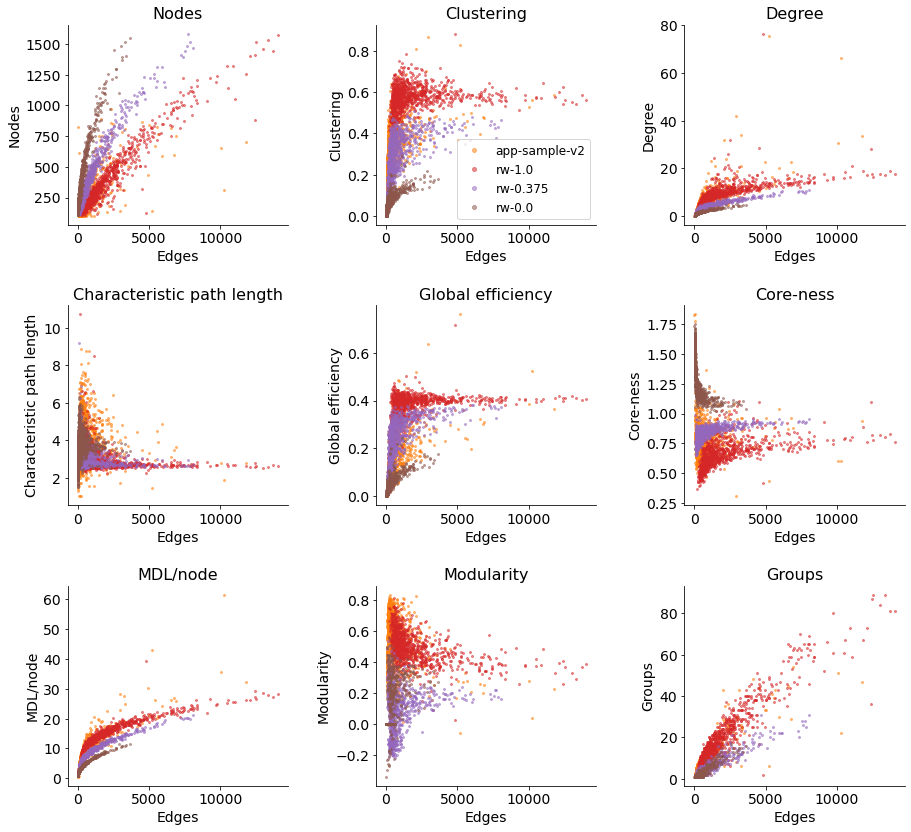

In [27]:
## edges
n_rows = 3
n_cols = 3

cols_plot = ["Nodes","Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]

alpha=0.5
ms = 2
fig = plt.figure(figsize=(15,14 ))
for i, label in enumerate(cols_plot):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    
    for i_dataset in i_datasets_plot:
        dataset = list_datasets[i_dataset]
        df = dict_datasets_df[dataset]
        try:
            x = df["Edges"].values
            y = df[label].values
            ax.plot(x,y,ms=ms,marker="o",lw=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
        except:
            pass
    
    ax.set_title(label)
    ax.set_xlabel("Edges")
    ax.set_ylabel(label)
    if i==1:
        ax.legend(markerscale=2)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.savefig("plots/1000-networks_wiki-rw_edges.png",dpi=300, facecolor='white', transparent=False)

### Pairwise Scatter

In [28]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

FileNotFoundError: [Errno 2] No such file or directory: 'plots/1000-networks_wiki-rw_scatter.png'

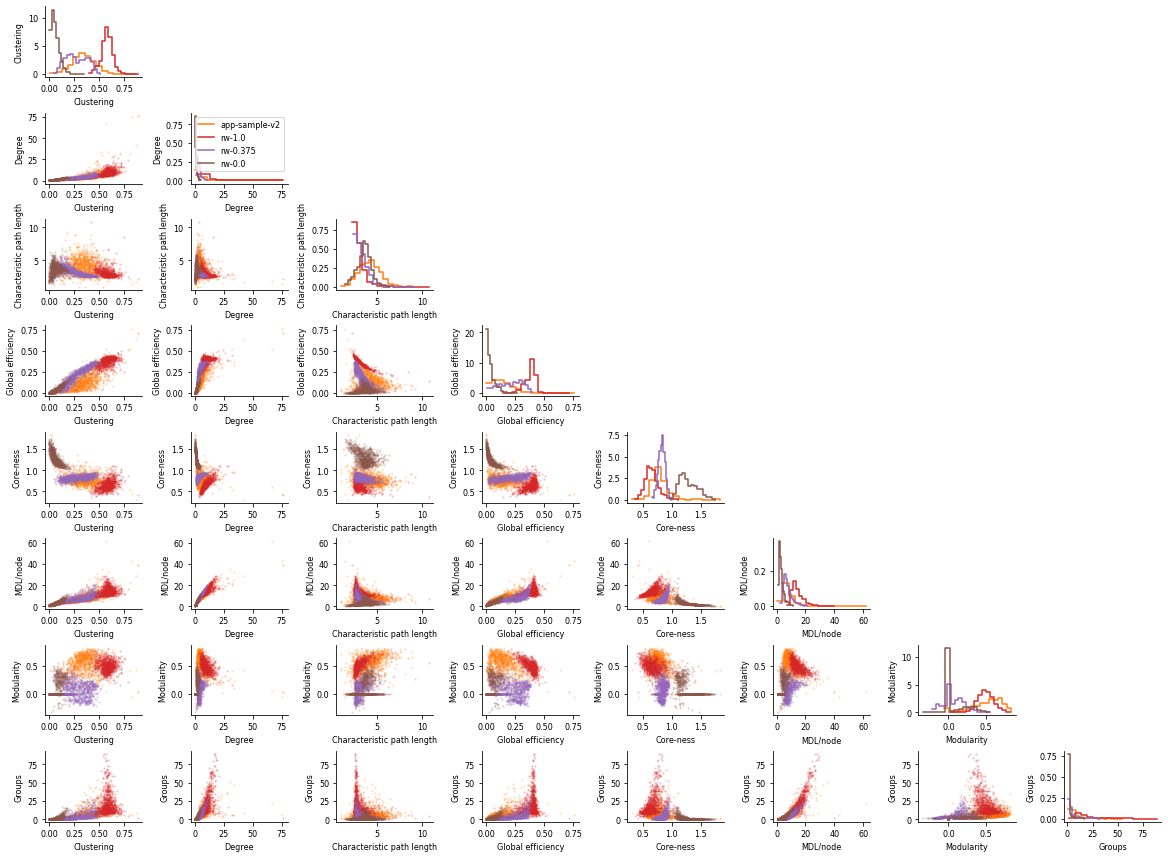

In [29]:

cols_plot = ["Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]
n_rows = len(cols_plot)
n_cols = len(cols_plot)

alpha=0.3
ms = 2

fig = plt.figure(figsize=(20,15 ))
i_plot=0
for i1, label1 in enumerate(cols_plot):
    for i2, label2 in enumerate(cols_plot):
        i_plot+=1
        if i1>i2:
            ax = fig.add_subplot(n_rows,n_cols,i_plot)
            
            for i_dataset in i_datasets_plot:
                dataset = list_datasets[i_dataset]
                df = dict_datasets_df[dataset]
                try:
                    y = df[label1].values
                    x = df[label2].values
                    ax.plot(x,y,ms=ms,marker="o",mew=0,lw=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
                except:
                    pass

#             ax.set_title(label)
            ax.set_xlabel(label2)
            ax.set_ylabel(label1)
#             ax.legend()
        if i1==i2:
            ax = fig.add_subplot(n_rows,n_cols,i_plot)
            
            for i_dataset in i_datasets_plot:
                dataset = list_datasets[i_dataset]
                df = dict_datasets_df[dataset]
                try:
                    x = df[label1].values
                    H,edges = np.histogram(x,bins=15,density=True)
                    H=np.append(H,0)
#                     H=H/np.sum(H)
                    ax.step(edges,H,where="post", label=dataset,color=dict_dc[dataset])
                except:
                    pass
            
            ax.set_xlabel(label2)
            ax.set_ylabel(label1)
            if i1==1:
                ax.legend(markerscale=2)
            
            
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.savefig("plots/1000-networks_wiki-rw_scatter.png",dpi=300, facecolor='white', transparent=False)

# Compare Wikipedia and Wikispeedia

In [30]:
i_datasets_plot = [0,1,6]

### Size Distribution

In [31]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

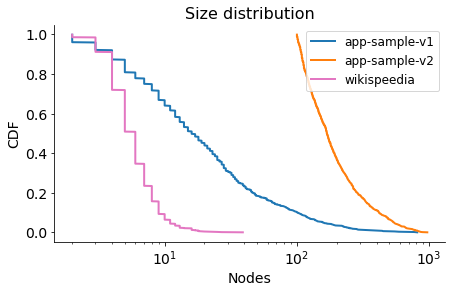

In [32]:
alpha=1
ms = 0
lw=2
fig = plt.figure(figsize=(7,4 ))
ax = fig.add_subplot(1,1,1)

for i_dataset in i_datasets_plot:
    dataset = list_datasets[i_dataset]
    df = dict_datasets_df[dataset]
    try:
        x = np.sort(df["Nodes"].values)
        y = 1.-(np.arange(len(x))+1)/len(x)
        ax.plot(x,y,ms=ms,marker="o",lw=lw, alpha=alpha, label=dataset,color=dict_dc[dataset])
    except:
        pass
        
ax.set_title("Size distribution")
ax.set_xlabel("Nodes")
ax.set_ylabel("CDF")
ax.legend(loc="upper right")
ax.set_xscale("log")
# plt.subplots_adjust(hspace=0.4,wspace=0.4)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))

### Scaling with Size

In [33]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

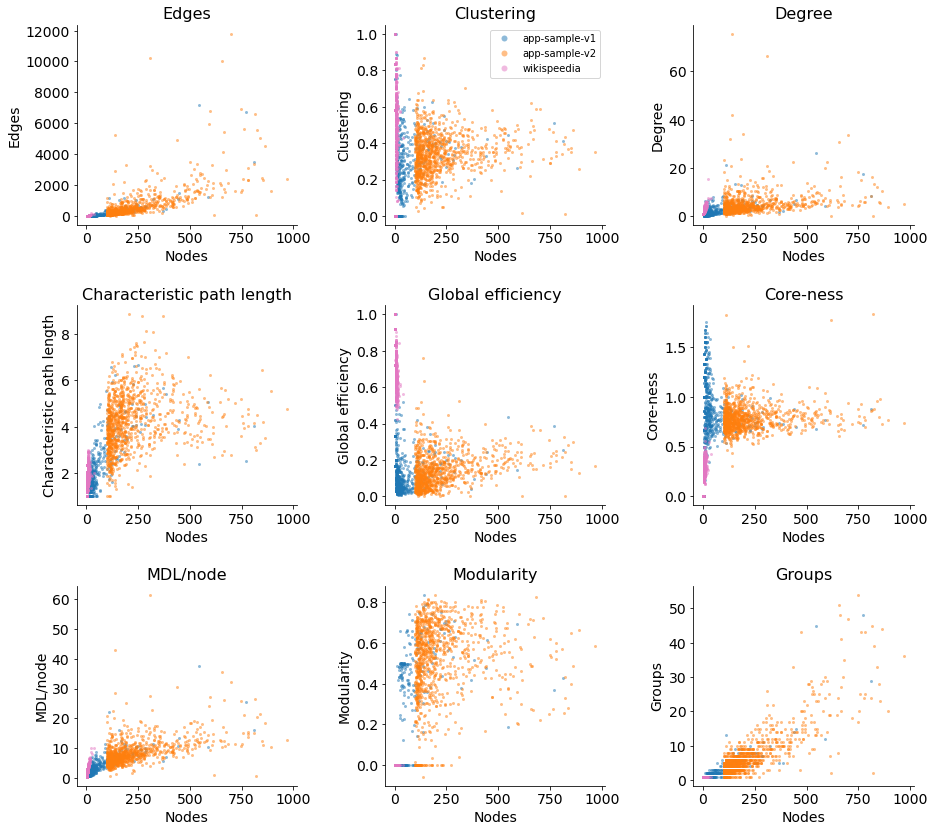

In [34]:
## nodes
n_rows = 3
n_cols = 3

cols_plot = ["Edges","Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]

alpha=0.5
ms = 3
fig = plt.figure(figsize=(15,14 ))
for i, label in enumerate(cols_plot):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    
    for i_dataset in i_datasets_plot:
        dataset = list_datasets[i_dataset]
        df = dict_datasets_df[dataset]
        try:
            x = df["Nodes"].values
            y = df[label].values
            ax.plot(x,y,ms=ms,marker="o",lw=0, mew=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
        except:
            pass
    
    ax.set_title(label)
    ax.set_xlabel("Nodes")
    ax.set_ylabel(label)
    if i==1:
        ax.legend(markerscale=2)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))

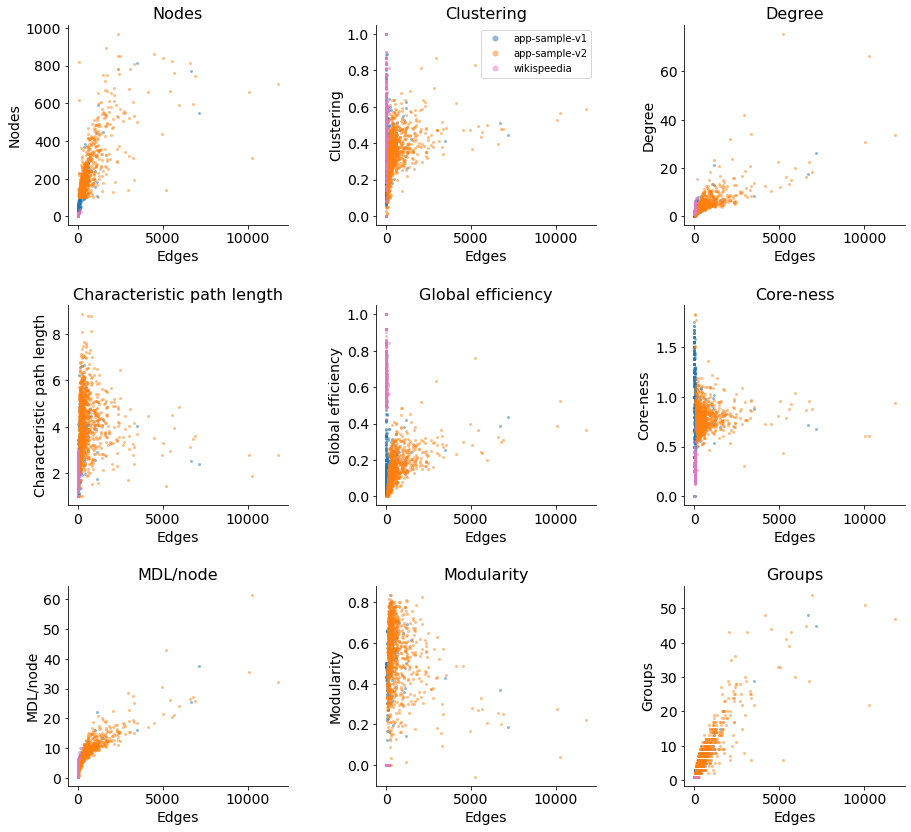

In [35]:
## edges
n_rows = 3
n_cols = 3

cols_plot = ["Nodes","Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]

alpha=0.5
ms = 3
fig = plt.figure(figsize=(15,14 ))
for i, label in enumerate(cols_plot):
    ax = fig.add_subplot(n_rows,n_cols,i+1)
    
    for i_dataset in i_datasets_plot:
        dataset = list_datasets[i_dataset]
        df = dict_datasets_df[dataset]
        try:
            x = df["Edges"].values
            y = df[label].values
            ax.plot(x,y,ms=ms,marker="o",lw=0,mew=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
        except:
            pass
    
    ax.set_title(label)
    ax.set_xlabel("Edges")
    ax.set_ylabel(label)
    if i==1:
        ax.legend(markerscale=2)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))

### Pairwise Scatter

In [36]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

FileNotFoundError: [Errno 2] No such file or directory: 'plots/1000-networks_wiki-wikispeedia_scatter.png'

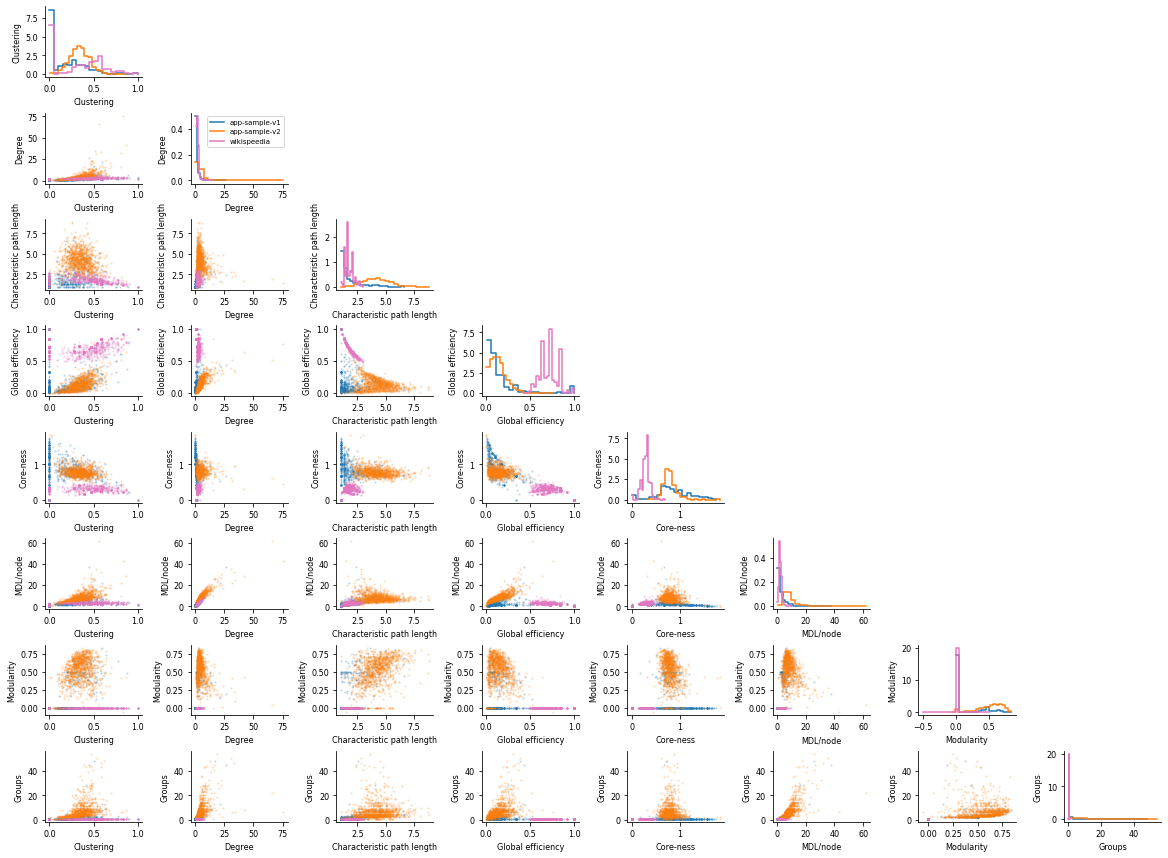

In [37]:

cols_plot = ["Clustering", "Degree", "Characteristic path length", "Global efficiency", "Core-ness", "MDL/node", "Modularity", "Groups"]
n_rows = len(cols_plot)
n_cols = len(cols_plot)

alpha=0.3
ms = 2

fig = plt.figure(figsize=(20,15 ))
i_plot=0
for i1, label1 in enumerate(cols_plot):
    for i2, label2 in enumerate(cols_plot):
        i_plot+=1
        if i1>i2:
            ax = fig.add_subplot(n_rows,n_cols,i_plot)
            
            for i_dataset in i_datasets_plot:
                dataset = list_datasets[i_dataset]
                df = dict_datasets_df[dataset]
                try:
                    y = df[label1].values
                    x = df[label2].values
                    ax.plot(x,y,ms=ms,marker="o",lw=0, mew=0, alpha=alpha, label=dataset,color=dict_dc[dataset])
                except:
                    pass

#             ax.set_title(label)
            ax.set_xlabel(label2)
            ax.set_ylabel(label1)
#             ax.legend()
        if i1==i2:
            ax = fig.add_subplot(n_rows,n_cols,i_plot)
            
            for i_dataset in i_datasets_plot:
                dataset = list_datasets[i_dataset]
                df = dict_datasets_df[dataset]
                try:
                    x = df[label1].values
                    H,edges = np.histogram(x,bins=20,density=True)
                    H=np.append(H,0)
#                     H=H/np.sum(H)
                    ax.step(edges,H,where="post", label=dataset,color=dict_dc[dataset])
                except:
                    pass
            
            ax.set_xlabel(label2)
            ax.set_ylabel(label1)
            if i1==1:
                ax.legend(markerscale=2)
            
            
plt.subplots_adjust(hspace=0.5,wspace=0.5)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))
plt.savefig("plots/1000-networks_wiki-wikispeedia_scatter.png",dpi=300, facecolor='white', transparent=False)

# MDL as a filtration metric

In [97]:
PATH_base = "/home/mgerlach/REPOS/curios-critical-readers/"
dict_datasets_filenames_filt = {
    "app-sample-v1": os.path.join(PATH_base,"results/filtration-metric-mdl_1000.json"),
    "app-sample-v2": os.path.join(PATH_base,"results/filtration-metric-mdl_1000_v2.json"),
    "rw-1.0": os.path.join(PATH_base,"results/filtration-metric-mdl_1000_v2_rw-1.0.json"),
    "rw-0.375": os.path.join(PATH_base,"results/filtration-metric-mdl_1000_v2_rw-0.375.json"),
    "rw-0.0": os.path.join(PATH_base,"results/filtration-metric-mdl_1000_v2_rw-0.0.json"),
    "wikispeedia": os.path.join(PATH_base,"results/filtration-metric-mdl_1000_wikispeedia-finished.json")
}

# i_datasets_plot = [1,3,4,5,6]
i_datasets_plot = [0, 1, 3, 4, 5]
# list_datasets = ["app-sample-v1","app-sample-v2","knot", "rw-1.0","rw-0.375","rw-0.0","wikispeedia"]

In [98]:
def get_mdl_curves(FILENAME_read):
    list_results = []
    list_n_all = []
    list_mdl_all = []

    with open(FILENAME_read) as fin:
        for line in fin:
            dict_result=json.loads(line)
            list_results+=[dict_result]

            list_n=np.array(dict_result["nodes"])
            list_e=np.array(dict_result["edges"])
            list_mdl=np.array(dict_result["mdl"])
            list_mdlr=np.array(dict_result["mdl_random"])
            delta_mdl_norm = (list_mdlr-list_mdl)/list_n
            list_n_all+=[list_n]
            list_mdl_all += [delta_mdl_norm]
    i_n_max = np.argmax([len(h) for h in list_n_all])
    list_n_max = list_n_all[i_n_max]
    n_max = len(list_n_max)
    arr_mdl_all = np.nan*np.zeros((len(list_mdl_all),n_max))

    for i_mdl,list_mdl in enumerate(list_mdl_all):
        n_mdl = len(list_mdl)
        arr_mdl_all[i_mdl,:n_mdl] = list_mdl
        
    arr_mdl_mu = np.nanmean(arr_mdl_all, axis=0)
    arr_mdl_std = np.nanstd(arr_mdl_all, axis=0)
    arr_mdl_n = np.sum( ~np.isnan(arr_mdl_all), axis=0)
    arr_mdl_ste = arr_mdl_std/np.sqrt(arr_mdl_n)
    return list_n_max, arr_mdl_mu, arr_mdl_std, arr_mdl_n

In [99]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

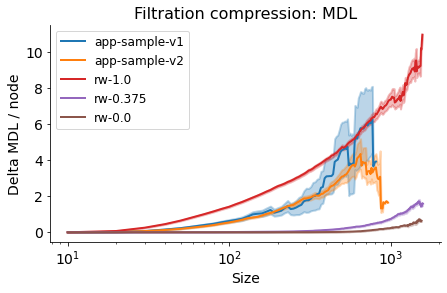

In [100]:
alpha=0.3
ms = 0
lw=2
fig = plt.figure(figsize=(7,4 ))
ax = fig.add_subplot(1,1,1)

for i_dataset in i_datasets_plot:
    

    dataset = list_datasets[i_dataset]
    FILENAME_read = dict_datasets_filenames_filt[dataset]
    list_n_max, arr_mdl_mu, arr_mdl_std, arr_mdl_n = get_mdl_curves(FILENAME_read)

    x = list_n_max
    y = arr_mdl_mu
    yerr = arr_mdl_std/np.sqrt(arr_mdl_n)
    y1=y-yerr
    y2=y+yerr
    # ax.errorbar(x,y,yerr=yerr,ms=ms,marker="o",lw=lw, alpha=alpha, label=dataset,color=dict_dc[dataset])
    ax.plot(x,y,ms=ms,marker="o",lw=lw, label=dataset,color=dict_dc[dataset])
    ax.fill_between(x,y1,y2,lw=lw, alpha=alpha, color=dict_dc[dataset])

ax.set_title("Filtration compression: MDL")
ax.set_xlabel("Size")
ax.set_ylabel("Delta MDL / node")
ax.legend(loc="upper left")
ax.set_xscale("log")
# plt.subplots_adjust(hspace=0.4,wspace=0.4)
# fig, axes = plt.subplots(n_rows, n_cols ,figsize=(15,12 ))

In [83]:
def get_curves(FILENAME_read, key):
    
    db = SqliteDict(FILENAME_read)
    
    list_n_all = [] 
    list_feature_all = []
    
    for idx in range(len(db)):
        list_n_all.append(db[idx]['n']) # number of nodes
        list_feature_all.append(db[idx][key]) 
    
    n_max = max(list_n_all) # largest network size
    
    arr_feature_all =  np.nan * np.zeros((len(list_feature_all), n_max))
    for i_feature, list_feature in enumerate(list_feature_all):
        n_feature = len(list_feature)
        arr_feature_all[i_feature, :n_feature] = list_feature
        
    arr_feature_mu = np.nanmean(arr_feature_all, axis = 0)
    arr_feature_std = np.nanstd(arr_feature_all, axis = 0)
    arr_feature_n = np.sum( ~np.isnan(arr_feature_all), axis = 0)  
    
    return arr_feature_mu, arr_feature_std, arr_feature_n

In [91]:
PATH_base = "/home/shubhankar/04272022/"
dict_datasets_filenames_filt = {
    "app-sample-v1": os.path.join(PATH_base, "filtration_metrics_small.sqlite"),
    "app-sample-v2": os.path.join(PATH_base, "filtration_metrics_small_v2.sqlite"),
    "rw-1.0": os.path.join(PATH_base, "filtration_metrics_small_v2_rw-1.0.sqlite"),
    "rw-0.375": os.path.join(PATH_base, "filtration_metrics_small_v2_rw-0.375.sqlite"),
    "rw-0.0": os.path.join(PATH_base, "filtration_metrics_small_v2_rw-0.0.sqlite")}

i_datasets_plot = [0, 1, 3, 4, 5]

# list_datasets = ["app-sample-v1","app-sample-v2","knot", "rw-1.0","rw-0.375","rw-0.0","wikispeedia"]

In [92]:
max_n = 968 # largest v2 network

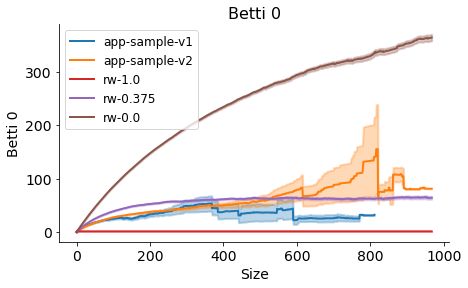

In [93]:
key = 'betti_0'

alpha = 0.3
ms = 0
lw = 2
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1, 1, 1)

for i_dataset in i_datasets_plot:
    
    dataset = list_datasets[i_dataset]
    
    FILENAME_read = dict_datasets_filenames_filt[dataset]
    arr_feature_mu, arr_feature_std, arr_feature_n = get_curves(FILENAME_read, key)

    x = list(range(len(arr_feature_mu)))
    y = arr_feature_mu
    yerr = arr_feature_std/np.sqrt(arr_feature_n)
    if len(x) > max_n:
        x = x[0:max_n]
        y = y[0:max_n]
        yerr = yerr[0:max_n]
    y1 = y - yerr
    y2 = y + yerr
    # ax.errorbar(x,y,yerr=yerr,ms=ms,marker="o",lw=lw, alpha=alpha, label=dataset,color=dict_dc[dataset])
    ax.plot(x, y, ms = ms, marker = "o", lw = lw, label = dataset, color = dict_dc[dataset])
    ax.fill_between(x, y1, y2, lw = lw, alpha = alpha, color = dict_dc[dataset])

ax.set_title("Betti 0")
ax.set_xlabel("Size")
ax.set_ylabel("Betti 0")
ax.legend(loc = "upper left")
# ax.set_xscale("log")

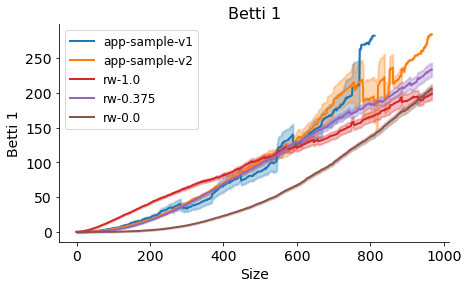

In [94]:
key = 'betti_1'

alpha = 0.3
ms = 0
lw = 2
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1, 1, 1)

for i_dataset in i_datasets_plot:
    
    dataset = list_datasets[i_dataset]
    
    FILENAME_read = dict_datasets_filenames_filt[dataset]
    arr_feature_mu, arr_feature_std, arr_feature_n = get_curves(FILENAME_read, key)

    x = list(range(len(arr_feature_mu)))
    y = arr_feature_mu
    yerr = arr_feature_std/np.sqrt(arr_feature_n)
    if len(x) > max_n:
        x = x[0:max_n]
        y = y[0:max_n]
        yerr = yerr[0:max_n]
    y1 = y - yerr
    y2 = y + yerr
    # ax.errorbar(x,y,yerr=yerr,ms=ms,marker="o",lw=lw, alpha=alpha, label=dataset,color=dict_dc[dataset])
    ax.plot(x, y, ms = ms, marker = "o", lw = lw, label = dataset, color = dict_dc[dataset])
    ax.fill_between(x, y1, y2, lw = lw, alpha = alpha, color = dict_dc[dataset])

ax.set_title("Betti 1")
ax.set_xlabel("Size")
ax.set_ylabel("Betti 1")
ax.legend(loc = "upper left")
# ax.set_xscale("log")

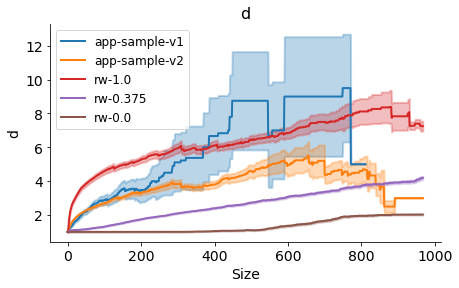

In [95]:
key = 'd'

alpha = 0.3
ms = 0
lw = 2
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1, 1, 1)

for i_dataset in i_datasets_plot:
    
    dataset = list_datasets[i_dataset]
    
    FILENAME_read = dict_datasets_filenames_filt[dataset]
    arr_feature_mu, arr_feature_std, arr_feature_n = get_curves(FILENAME_read, key)

    x = list(range(len(arr_feature_mu)))
    y = arr_feature_mu
    yerr = arr_feature_std/np.sqrt(arr_feature_n)
    if len(x) > max_n:
        x = x[0:max_n]
        y = y[0:max_n]
        yerr = yerr[0:max_n]
    y1 = y - yerr
    y2 = y + yerr
    # ax.errorbar(x,y,yerr=yerr,ms=ms,marker="o",lw=lw, alpha=alpha, label=dataset,color=dict_dc[dataset])
    ax.plot(x, y, ms = ms, marker = "o", lw = lw, label = dataset, color = dict_dc[dataset])
    ax.fill_between(x, y1, y2, lw = lw, alpha = alpha, color = dict_dc[dataset])

ax.set_title("d")
ax.set_xlabel("Size")
ax.set_ylabel("d")
ax.legend(loc = "upper left")
# ax.set_xscale("log")

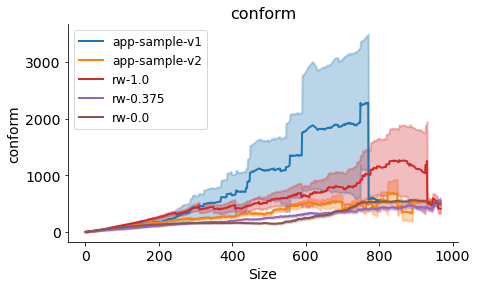

In [96]:
key = 'conform'

alpha = 0.3
ms = 0
lw = 2
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1, 1, 1)

for i_dataset in i_datasets_plot:
    
    dataset = list_datasets[i_dataset]
    
    FILENAME_read = dict_datasets_filenames_filt[dataset]
    arr_feature_mu, arr_feature_std, arr_feature_n = get_curves(FILENAME_read, key)

    x = list(range(len(arr_feature_mu)))
    y = arr_feature_mu
    yerr = arr_feature_std/np.sqrt(arr_feature_n)
    if len(x) > max_n:
        x = x[0:max_n]
        y = y[0:max_n]
        yerr = yerr[0:max_n]
    y1 = y - yerr
    y2 = y + yerr
    # ax.errorbar(x,y,yerr=yerr,ms=ms,marker="o",lw=lw, alpha=alpha, label=dataset,color=dict_dc[dataset])
    ax.plot(x, y, ms = ms, marker = "o", lw = lw, label = dataset, color = dict_dc[dataset])
    ax.fill_between(x, y1, y2, lw = lw, alpha = alpha, color = dict_dc[dataset])

ax.set_title("conform")
ax.set_xlabel("Size")
ax.set_ylabel("conform")
ax.legend(loc = "upper left")
# ax.set_xscale("log")